Исследование объявлений о продаже квартир
------------

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

In [1]:
try:
    import pandas as pd
    import missingno as msno 
    import matplotlib.pyplot as plt
    import numpy as np
    
except ImportError:
    !pip install --upgrade missingno
    import pandas as pd
    import matplotlib.pyplot as plt
    import missingno as msno
    import numpy as np




In [2]:
try:
    data = pd.read_csv("Наборы данных/real_estate_data.csv",sep="\t",parse_dates=["first_day_exposition"])
except:
    data = pd.read_csv("/datasets/real_estate_data.csv",sep="\t",parse_dates=["first_day_exposition"])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1 Предобработка данных
------------------------

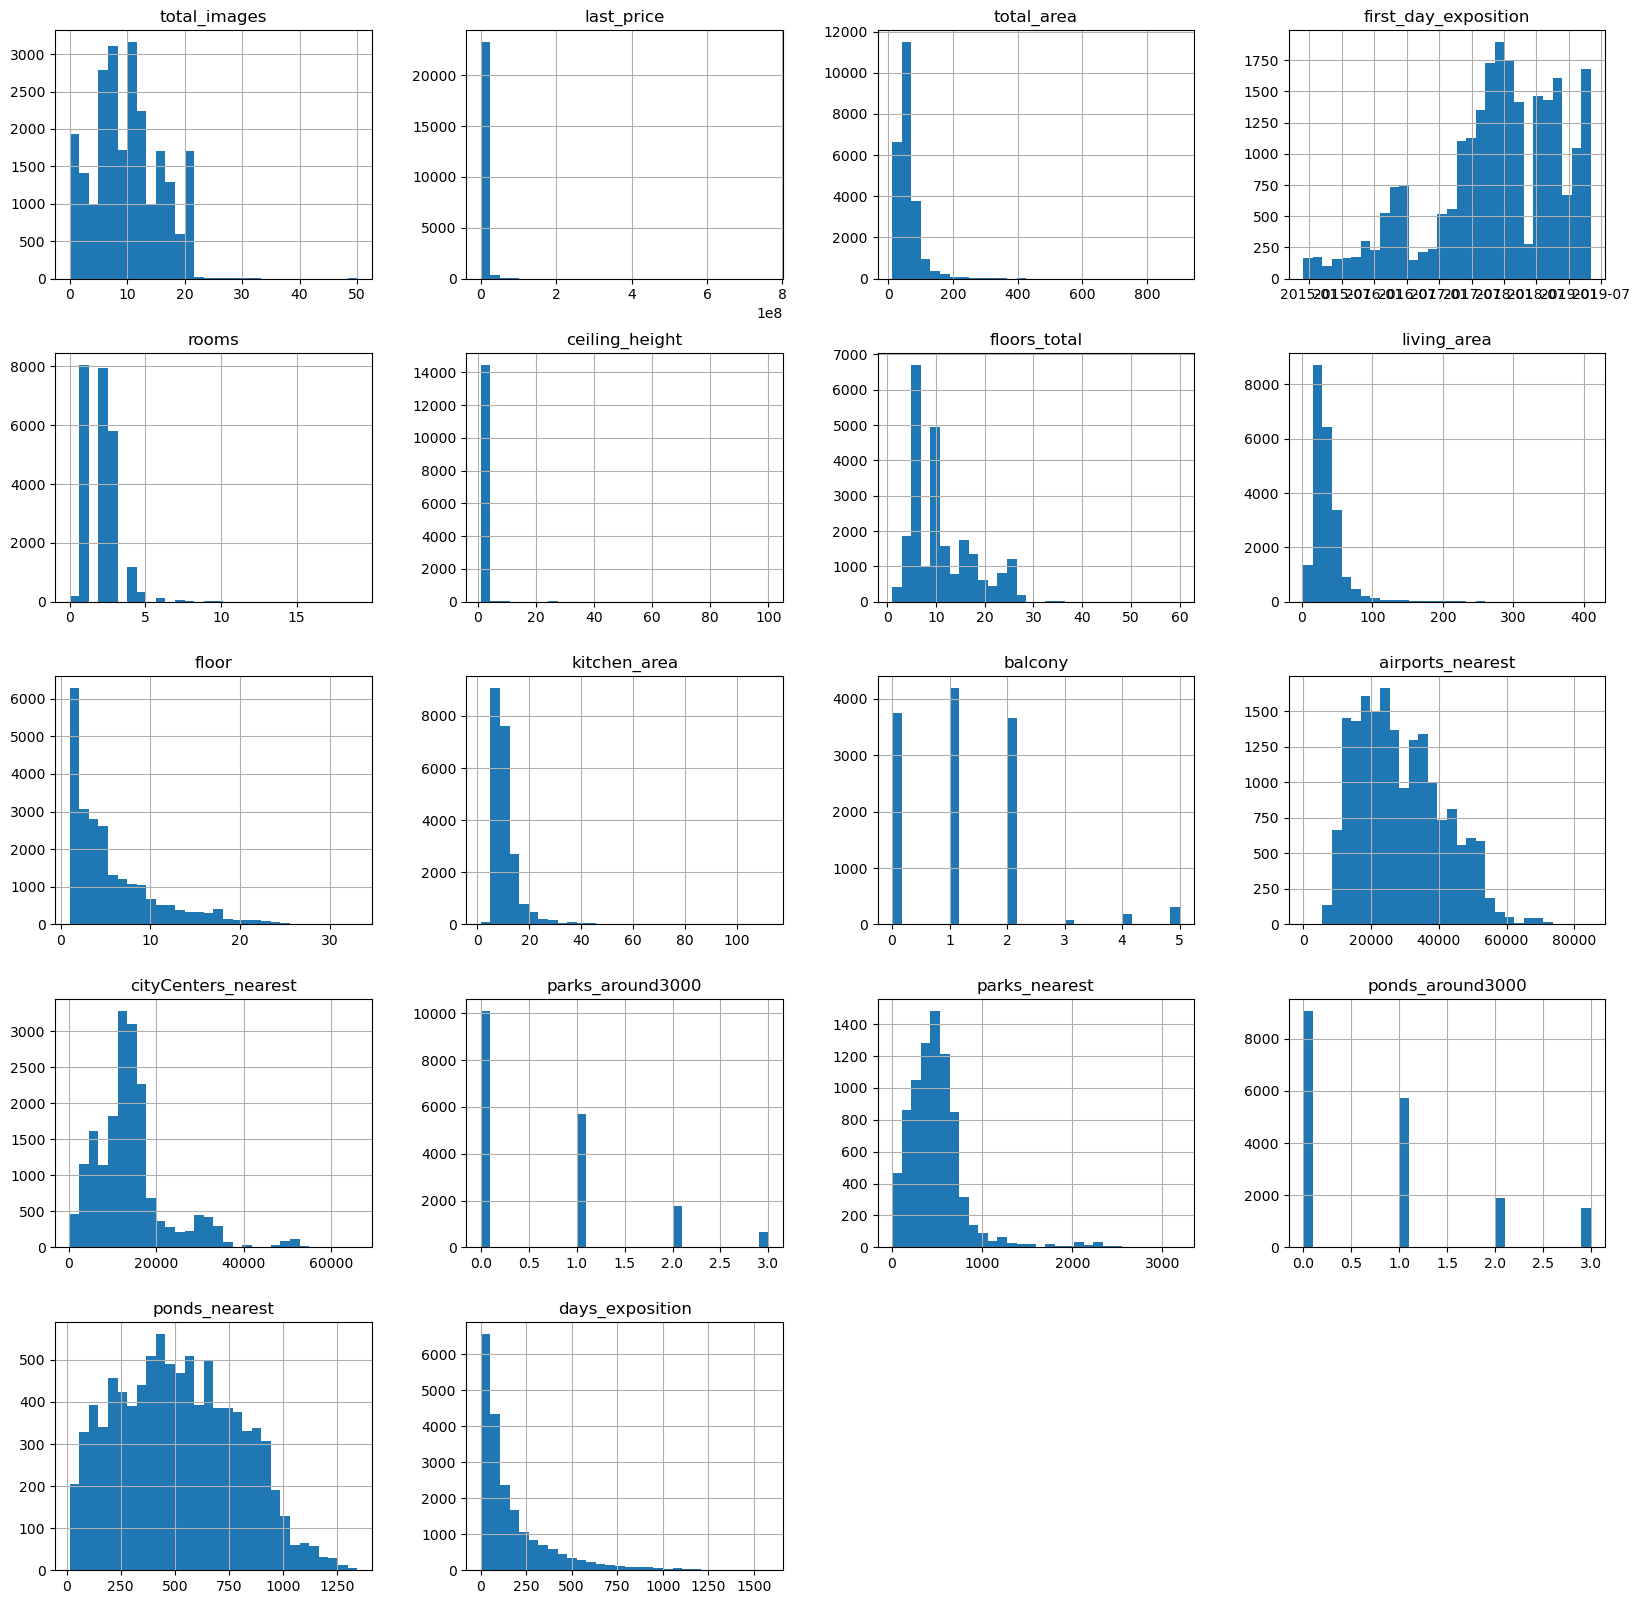

In [5]:
data.hist(figsize=(20,20),bins=30);

<Axes: >

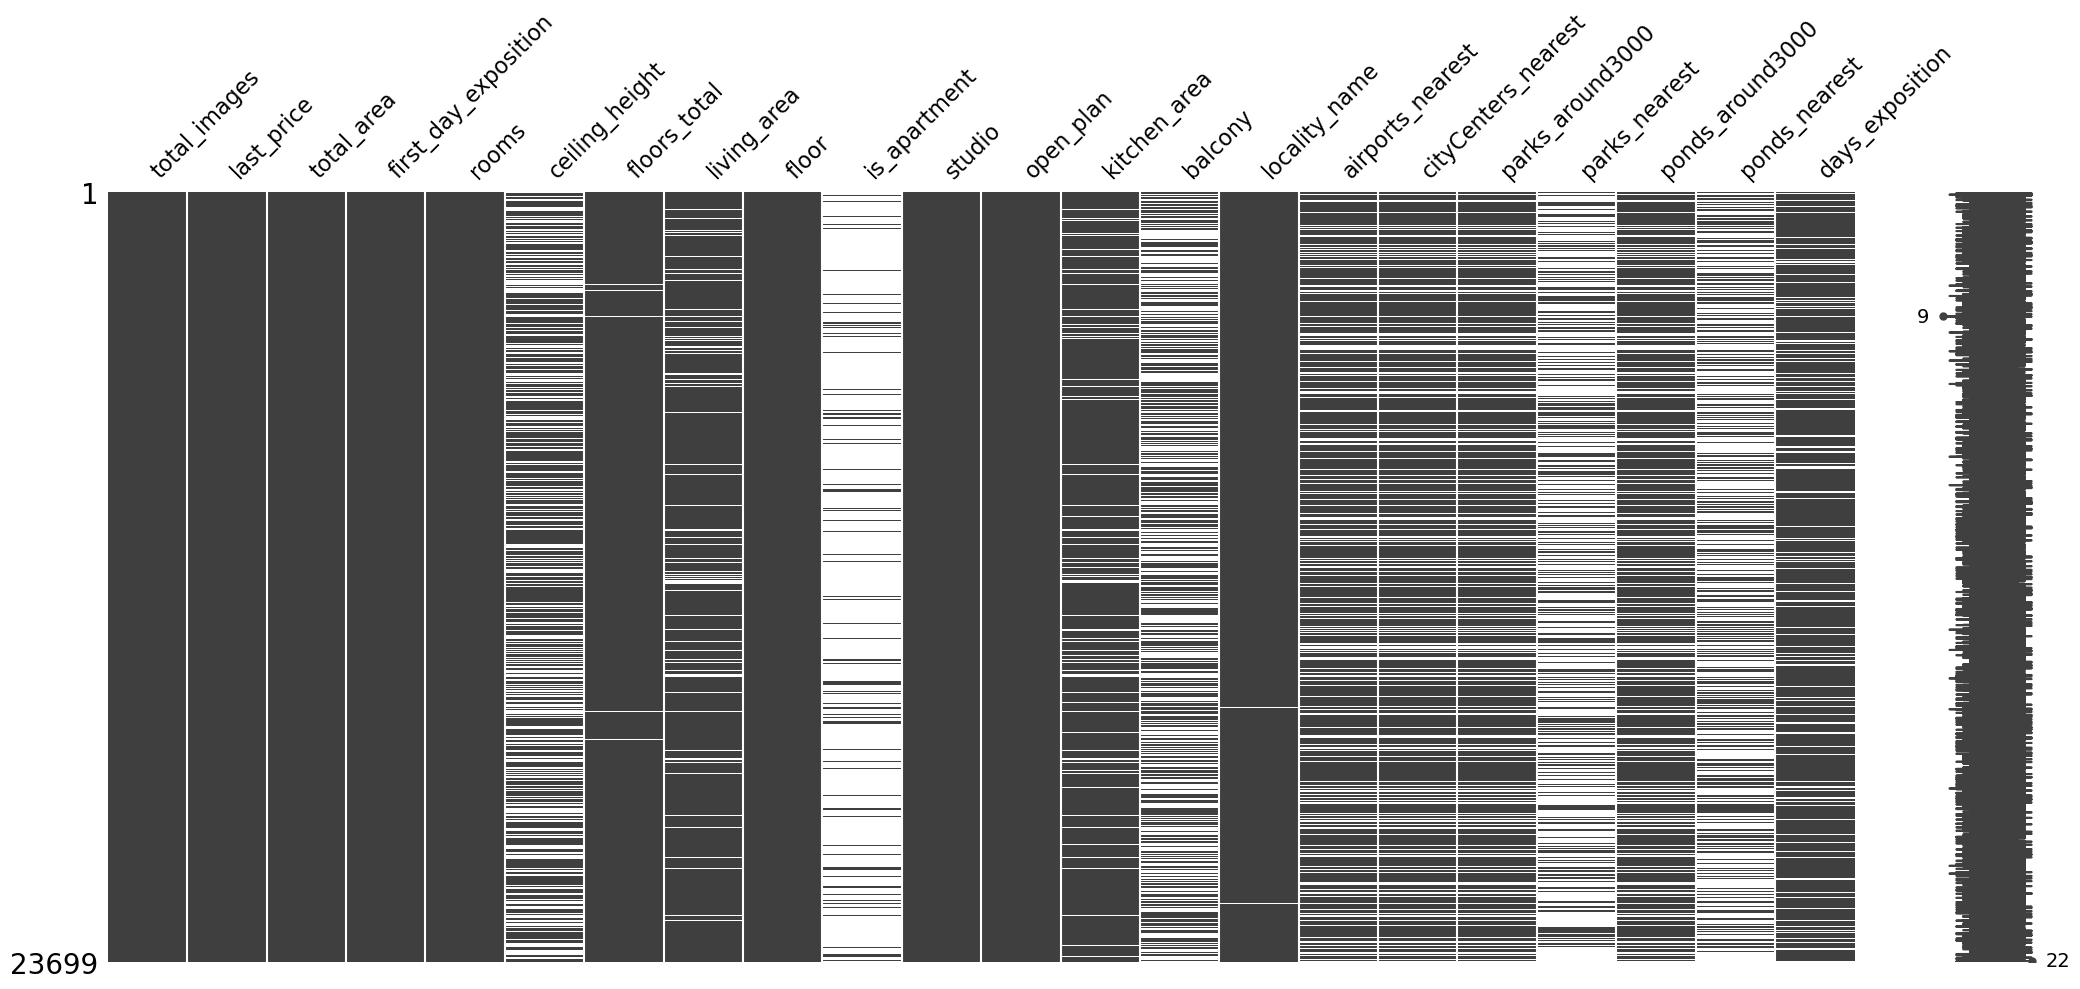

In [6]:
msno.matrix(data)

<Axes: >

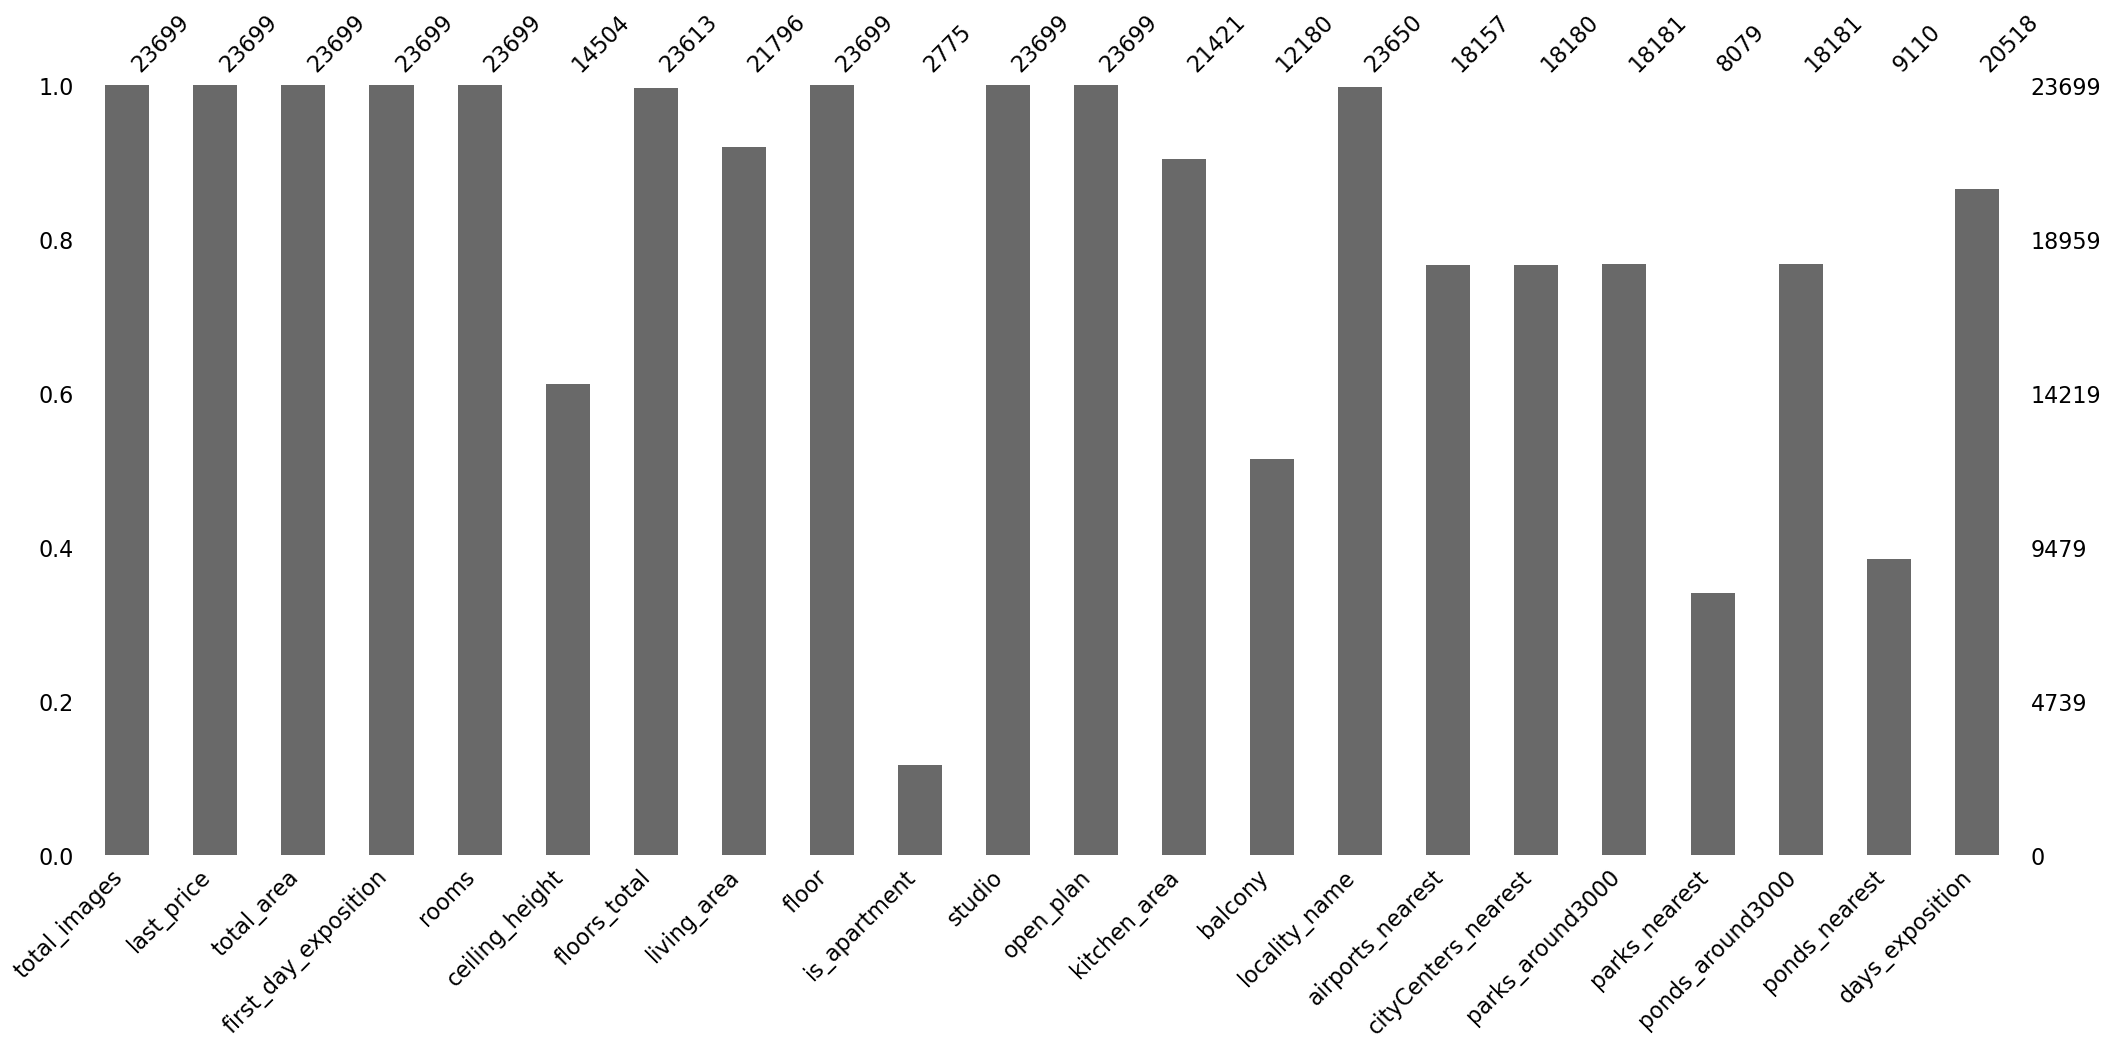

In [7]:
msno.bar(data)

Построим матрицу корреляции
----

In [8]:
corr_data = data[["ceiling_height","is_apartment","living_area","kitchen_area","balcony","airports_nearest","cityCenters_nearest","parks_around3000","parks_nearest","ponds_around3000","ponds_nearest","days_exposition"]].isna().corr()

In [9]:
corr_data

,ceiling_height,is_apartment,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
ceiling_height,1.000000,0.044080,0.117150,0.133419,-0.034177,0.087508,0.088848,0.088934,0.063861,0.088934,0.027876,-0.128583
is_apartment,0.044080,1.000000,0.049657,0.034166,0.228909,0.005560,0.005663,0.005627,0.000277,0.005627,0.002503,0.037525
living_area,0.117150,0.049657,1.000000,0.674841,0.149131,0.066024,0.066063,0.066097,0.023498,0.066097,0.011657,-0.026159
kitchen_area,0.133419,0.034166,0.674841,1.000000,0.126531,0.062328,0.062489,0.062526,0.026145,0.062526,0.009321,-0.043155
balcony,-0.034177,0.228909,0.149131,0.126531,1.000000,0.004645,0.005486,0.005584,-0.033870,0.005584,-0.017710,0.139644
airports_nearest,0.087508,0.005560,0.066024,0.062328,0.004645,1.000000,0.997055,0.997174,0.393122,0.997174,0.434934,0.036006
cityCenters_nearest,0.088848,0.005663,0.066063,0.062489,0.005486,0.997055,1.000000,0.999882,0.396041,0.999882,0.435391,0.036669
parks_around3000,0.088934,0.005627,0.066097,0.062526,0.005584,0.997174,0.999882,1.000000,0.396205,1.000000,0.435340,0.036418
parks_nearest,0.063861,0.000277,0.023498,0.026145,-0.033870,0.393122,0.396041,0.396205,1.000000,0.396205,0.314458,-0.015824
ponds_around3000,0.088934,0.005627,0.066097,0.062526,0.005584,0.997174,0.999882,1.000000,0.396205,1.000000,0.435340,0.036418


In [10]:
corr_data.where(corr_data > 0.3, np.NaN).dropna(axis=1,thresh=2).dropna(axis=0,thresh=2)

,living_area,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
living_area,1.000000,0.674841,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,0.674841,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
airports_nearest,NaN,NaN,1.000000,0.997055,0.997174,0.393122,0.997174,0.434934
cityCenters_nearest,NaN,NaN,0.997055,1.000000,0.999882,0.396041,0.999882,0.435391
parks_around3000,NaN,NaN,0.997174,0.999882,1.000000,0.396205,1.000000,0.435340
parks_nearest,NaN,NaN,0.393122,0.396041,0.396205,1.000000,0.396205,0.314458
ponds_around3000,NaN,NaN,0.997174,0.999882,1.000000,0.396205,1.000000,0.435340
ponds_nearest,NaN,NaN,0.434934,0.435391,0.435340,0.314458,0.435340,1.000000


In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

is_apartment можно удалить так как эта переменная в основном состоит из пропусков, она не влияет на другие переменные

In [12]:
data = data.drop("is_apartment",axis=1)

В столбце balcony, у многих значений стоит пропуск, скорее всего у этих кваартир нету балконов. Заменим пропуски на 0.

In [13]:
data["balcony"] = data["balcony"].fillna(0)

Также в столбцах ponds_around3000 и parks_around3000 присутствуют пропущенные значения. Это можно объяснить тем что в радиусе 3000 метров нету водоемов или парков. Заменим пропуски в этих значениях на 0.

In [14]:
data[["parks_around3000","ponds_around3000"]] = data[["parks_around3000","ponds_around3000"]].fillna(0)

Создадим сводную таблицу, где будем группировать значения по числу комнат в квартире. Сгруппируем для того чтобы найти медианное значение ceiling_height, kitchen_area, living_area

In [15]:
data.rooms.unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

Можно заметить, что присутствуют квартиры в которых 0 комнат.

In [16]:
data.query('rooms == 0').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0


Заменим 0 на 1 т.к. не может быть квартир без комнат

----------------------------

In [17]:
data.query('rooms == 0 and total_area > 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3458,6,7400000.0,73.6,2017-05-18,0,NaN,3.0,50.0,1,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7.0,33.0,6,True,False,NaN,0.0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,False,True,NaN,0.0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5.0,60.5,2,True,False,NaN,0.0,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5.0,68.0,5,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


Мы можем заметить, что есть одна квартира не студия, где общая площадь равна 371 кв м, а комнат в квартире 0 . Чтобы эта квартира не влияла на общий анализ ее стоит удалить.



In [18]:
data = data.drop(19392)

---------------------------

In [19]:
data['rooms'] = data["rooms"].replace(0,1)

In [20]:
data["rooms"].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

Создадим сводную таблицу в которой будем хранить медианные значения высоты потолка, размера кухни и размера жилой зоны, для того чтобы потом заполнить пропуски в столбцах ceiling_height, living_area, kitchen_area.

In [21]:
data_parameters = data.pivot_table(index=["rooms","studio"],values=["ceiling_height","living_area","kitchen_area"],aggfunc="median")

In [22]:
data_parameters

ceiling_height  kitchen_area  living_area
rooms studio                                           
1     False            2.640          9.04       17.600
      True             2.700           NaN       18.000
2     False            2.600          8.80       30.500
3     False            2.650          9.50       45.000
4     False            2.800         11.10       63.600
5     False            3.100         15.10       91.785
6     False            3.200         19.50      123.900
7     False            3.380         20.00      145.000
8     False            3.420         25.00      161.000
9     False            3.200         14.30      179.200
10    False            3.150         19.80      161.400
11    False            3.415         12.60      133.900
12    False            2.800        112.00      409.700
14    False            3.160         21.25      195.150
15    False            3.500        100.00      409.000
16    False            3.000         13.00      180.000
19    False              NaN         27.60      264.500

Заметим, что в квартире студии зона кухни равна пропущенному значению, запоним ее 0. В квартире, где 19 комнат высота потолка тоже пропущенное значение, это объясняется тем что за все время продавалась только одна квартира с таким кол-ом комнат и высоту потолка не указали. Заполним ее медианным значением по всем медианным значениям высоты потолка. 

In [23]:
data_parameters.loc[(1,True),"kitchen_area"] = 0
data_parameters.loc[(19,False),"ceiling_height"] = data_parameters.loc[:,"ceiling_height"].median()

In [24]:
data_parameters

ceiling_height  kitchen_area  living_area
rooms studio                                           
1     False            2.640          9.04       17.600
      True             2.700          0.00       18.000
2     False            2.600          8.80       30.500
3     False            2.650          9.50       45.000
4     False            2.800         11.10       63.600
5     False            3.100         15.10       91.785
6     False            3.200         19.50      123.900
7     False            3.380         20.00      145.000
8     False            3.420         25.00      161.000
9     False            3.200         14.30      179.200
10    False            3.150         19.80      161.400
11    False            3.415         12.60      133.900
12    False            2.800        112.00      409.700
14    False            3.160         21.25      195.150
15    False            3.500        100.00      409.000
16    False            3.000         13.00      180.000
19    False            3.125         27.60      264.500

In [25]:
for r,s in data_parameters.index:
    for c in data_parameters.columns:
        data.loc[(data["rooms"]==r) & (data["studio"]==s),c] = data.loc[(data["rooms"]==r) & (data["studio"]==s),c].fillna(data_parameters.loc[(r,s),c])

---------------------------------


В столбцах floors_total и locality_name так же есть пропуски, но их мало, поэтому можно удалить строки, в которых floors_total или locality_name имеют пропущенное значение.

In [26]:
data["locality_name"].isna().sum()/data["locality_name"].count()*100

0.20719692164573555

In [27]:
data["floors_total"].isna().sum()/data["floors_total"].count()*100

0.36422158224631546

In [28]:
data = data.dropna(subset=["floors_total","locality_name"])

------------------------------------

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Заполнить значения с столбце days_exposition невозможно, так как логически обосновать пропущенные значения не получается. Так же не получится заполнить значения в столбцах airports_nearest, cityCenters_nearest, так как, если заполнить пропуски в этих столбцах с помощью медианы, то это приведет к искажению данных. 

Пропущенные значения в ponds_nearest и parks_nearest можно объяснить тем, что люди просто не знали расстояния до пруда или же до парка при подаче заявления на продажу квартиры.

In [30]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


2 Рассмотрите типов данных в каждом столбце
----------------------------------

Можно заметить, что столбец first_day_exposition в строковом типе. Переведем этот столбец в тип datetime64. (Я его перевел в этот тип сразу, когда прочитал файл с данными).

Столбец last_price, floors_total, balcony, parks_around3000, ponds_around3000 можно перевести в целочисленный тип

In [31]:
data[["last_price","floors_total","balcony","parks_around3000","ponds_around3000"]] = data[["last_price","floors_total","balcony","parks_around3000","ponds_around3000"]].astype("int")

Столбец last_price изначально был в вещественном типе, но значения в нем целые, поэтому мы можем его заменить в целочисленный тип. В столбце floors_total, balcony, parks_around3000, ponds_around3000 были пропущенные значения из-за этого значения в этих столбцах были в вещественном типе. После заполнения пропусков, мы можем изменить тип на целочисленный, потому что значения в этих столбцах не могут быть вещественными.

In [32]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.64,11,18.6,1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


3 Устранение неявных дубликатов.
---------------------

In [33]:
#pd.set_option('display.max_rows', 400)
data["locality_name"]=(data["locality_name"]
 .str.replace("ё","е")
 .replace(["поселок городского типа имени","поселок городского типа","поселок","деревня","городской поселок","село"],"",regex=True)
 .str.strip()
)

Шаг 3. Добавление в таблицу новых столбцов
--------------------------------------

In [34]:
data_main = data[["last_price","total_area","first_day_exposition","rooms","ceiling_height","floors_total","living_area","floor","kitchen_area","locality_name","cityCenters_nearest","parks_nearest","days_exposition"]]

In [35]:
data_main

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,parks_nearest,days_exposition
0,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,25.00,Санкт-Петербург,16028.0,482.0,NaN
1,3350000,40.40,2018-12-04,1,2.64,11,18.6,1,11.00,Шушары,18603.0,NaN,81.0
2,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,8.30,Санкт-Петербург,13933.0,90.0,558.0
3,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,9.50,Санкт-Петербург,6800.0,84.0,424.0
4,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,41.00,Санкт-Петербург,8098.0,112.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,13.83,Санкт-Петербург,4232.0,796.0,NaN
23695,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,8.50,Тосно,NaN,NaN,45.0
23696,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,8.80,Рождествено,NaN,NaN,NaN
23697,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,23.30,Санкт-Петербург,10364.0,173.0,602.0


In [36]:
data_main.loc[:,"price_per_square_meter"] = round(data_main.loc[:,"last_price"]/data_main.loc[:,"total_area"],2)


C:\Users\Максим\AppData\Local\Temp\ipykernel_16540\2737199859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main.loc[:,"price_per_square_meter"] = round(data_main.loc[:,"last_price"]/data_main.loc[:,"total_area"],2)


In [37]:
data_main.loc[:,"day"] = data_main.loc[:,"first_day_exposition"].dt.dayofweek

C:\Users\Максим\AppData\Local\Temp\ipykernel_16540\3755619963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main.loc[:,"day"] = data_main.loc[:,"first_day_exposition"].dt.dayofweek


In [38]:
data_main.loc[:,"month"] = data_main.loc[:,"first_day_exposition"].dt.month

C:\Users\Максим\AppData\Local\Temp\ipykernel_16540\1068696449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main.loc[:,"month"] = data_main.loc[:,"first_day_exposition"].dt.month


In [39]:
data_main.loc[:,"year"] = data_main.loc[:,"first_day_exposition"].dt.year

C:\Users\Максим\AppData\Local\Temp\ipykernel_16540\561185912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main.loc[:,"year"] = data_main.loc[:,"first_day_exposition"].dt.year


In [40]:
def determine_the_floor(data):
    if data.floors_total == data.floor:
        return "последний"
    elif data.floor == 1:
        return "первый"
    else:
        return "другой"
        

data_main.loc[:,"type_floor"] =data.apply(determine_the_floor,axis=1)

C:\Users\Максим\AppData\Local\Temp\ipykernel_16540\1806308408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main.loc[:,"type_floor"] =data.apply(determine_the_floor,axis=1)


In [41]:
data_main.loc[:,"cityCenters_nearest"]=(data_main["cityCenters_nearest"]/1000).round()

In [42]:
data_main.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,parks_nearest,days_exposition,price_per_square_meter,day,month,year,type_floor
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16.0,482.0,NaN,120370.37,3,3,2019,другой
1,3350000,40.4,2018-12-04,1,2.64,11,18.6,1,11.0,Шушары,19.0,NaN,81.0,82920.79,1,12,2018,первый
2,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,8.3,Санкт-Петербург,14.0,90.0,558.0,92785.71,3,8,2015,другой
3,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,9.5,Санкт-Петербург,7.0,84.0,424.0,408176.10,4,7,2015,другой
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8.0,112.0,121.0,100000.00,1,6,2018,другой


Шаг 4. Исследовательский анализ данных:
----------------

Общая площадь
----------

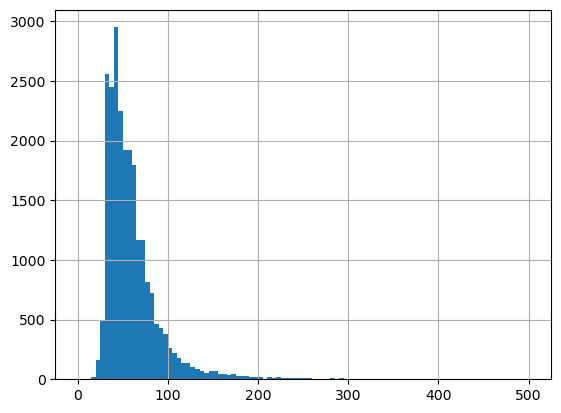

In [43]:
data_main["total_area"].hist(bins=100,range=(0,500));

Распределение похоже на Пуассоновское – основная масса значений сосредоточена в начале, а после площади 150 наблюдается резкий спад.

Обрезка выборки – разумно исключить значения > 200, так как они встречаются редко и могут считатьсредкими значениямиминия.

In [44]:
len(data_main.query('total_area>200'))

225

Всего получилось 225 строк, в которых общая площадь больше 200 кв.м.

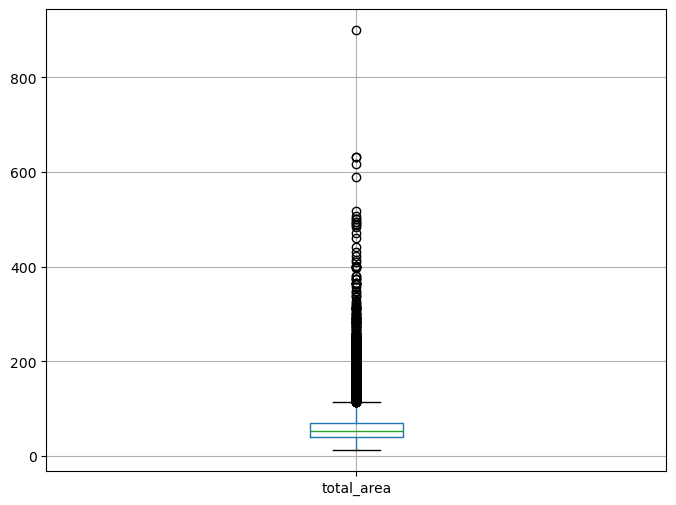

In [45]:
data_main.boxplot(column="total_area",figsize=(8,6));

In [46]:
data_main["total_area"].describe()

count    23564.000000
mean        60.309640
std         35.600329
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [47]:
good_data = data_main.query('total_area < 200')

Жилая площадь
------------

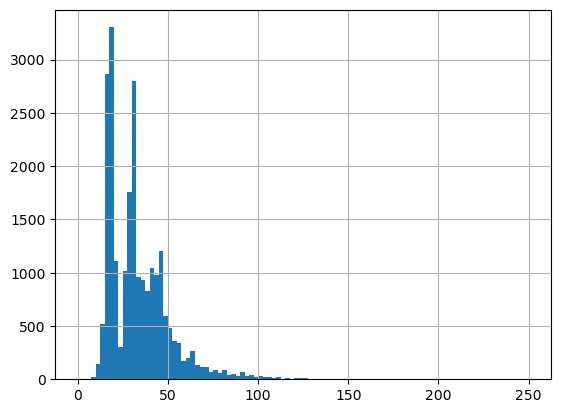

In [48]:
good_data["living_area"].hist(bins=100,range=(0,250));

Распределение похоже на Пуассоновское – основная масса значений сосредоточена в начале, а после площади 100 наблюдается резкий спад.

Обрезка выборки – разумно исключить значения > 100, так как они встречаются редко и могут считаться редкими значениями.


In [49]:
len(good_data.query('living_area > 100'))

176

Всего получилось 176 строк, в которых жилая площадь больше 120 кв.м.

In [50]:
good_data = good_data.query("living_area < 100")

Площадь кухни
--------------

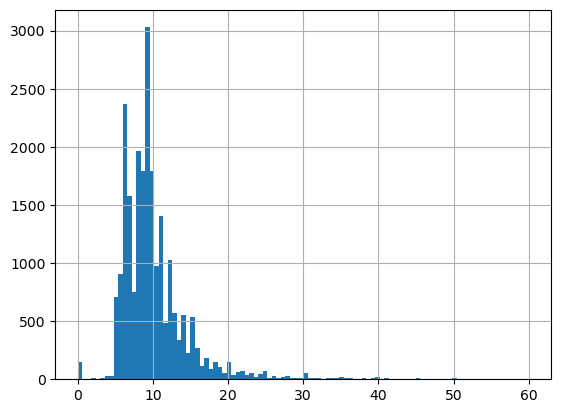

In [51]:
good_data["kitchen_area"].hist(bins=100,range=(0,60));

Распределение похоже на Пуассоновское – основная масса значений сосредоточена в начале, а после площади 35 наблюдается резкий спад.

Обрезка выборки – разумно исключить значения > 35, так как они встречаются редко и могут считаться редкими значениями.

Также, можно заметить, что есть квартиры в которых площадь кухни равна 0, это объясняется тем что эти квартиры - студии.


In [52]:
len(data.query('kitchen_area > 35'))

214

Всего получилось 214 строк, в которых площадь кухни больше 35 кв.м.

In [53]:
good_data = good_data.query("kitchen_area <= 35")

Цена объекта
---------

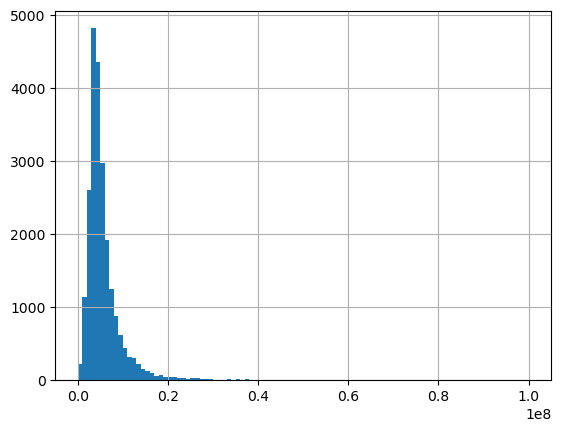

In [54]:
good_data["last_price"].hist(bins=100,range=(0,1000_000_00));

In [55]:
len(good_data.query('last_price>25_000_000'))

216

In [56]:
good_data = good_data.query("last_price<25_000_000")

Количество комнат
---------------

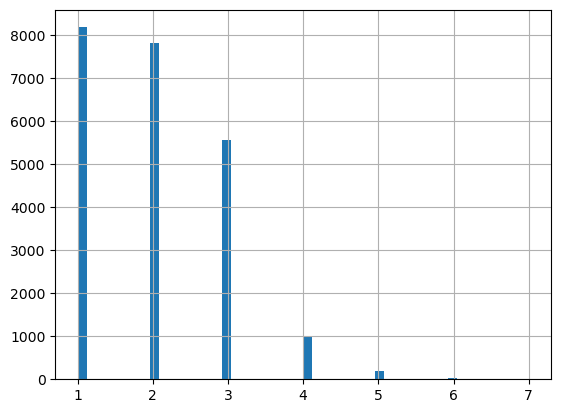

In [57]:
good_data["rooms"].hist(bins=50);

Можно заметить, что квартир у которых 6 комнат, маленькое количество. Можно их удалить из основной выборки

In [58]:
len(good_data.query('rooms == 6'))

20

In [59]:
good_data = good_data.query('rooms < 6')

Высота потолков
----

<Axes: >

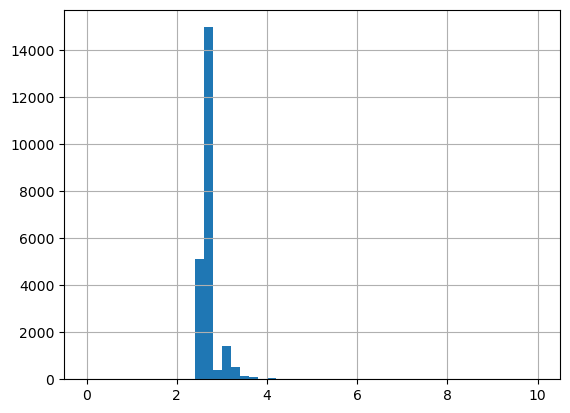

In [60]:
good_data["ceiling_height"].hist(bins=50,range=(0,10))

Можно заметить, что квартир у которых высота потолков выше 4 метров маленькое количество. Можно их удалить из основной выборки

In [61]:
len(good_data.query('ceiling_height > 4'))

59

In [62]:
good_data = good_data.query('ceiling_height < 4')

Тип этажа квартиры
----------

<Axes: >

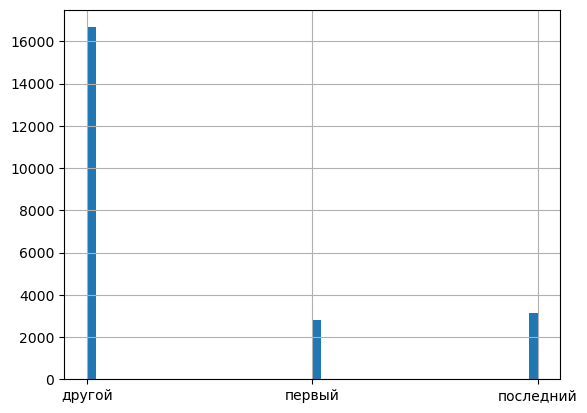

In [63]:
good_data["type_floor"].hist(bins=50)

Редких и аномальных значений нет

Общее количество этажей в доме
--------------

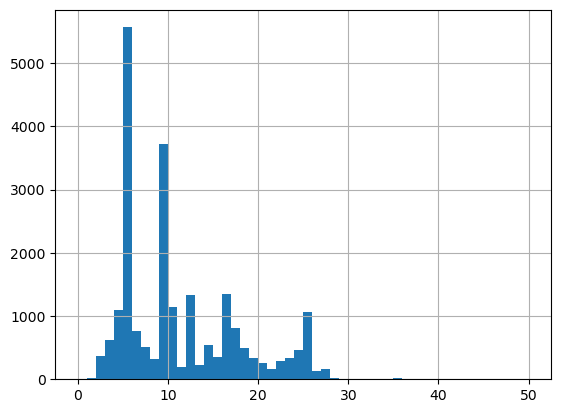

In [64]:
good_data["floors_total"].hist(bins=50,range=(0,50));

Можно заметить, что у квартир у которых в доме больше 27 этажей, маленькое количество. Можно их удалить. Также, можно заметить что в данной выборке присутствуют дома, а в выборке должны быть только квартиры. Их тоже удалим.

In [65]:
len(good_data.query('floors_total > 27'))

53

In [66]:
good_data = good_data.query('floors_total < 27 and floors_total != 1')

Расстояние до центра города в метрах
--------------

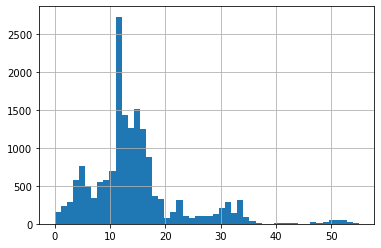

In [67]:
good_data["cityCenters_nearest"].hist(bins=50,range=(0,55));

Удалим значения больше 37 так как они являютя выбросами

In [68]:
len(good_data.query('cityCenters_nearest > 37'))

305

In [71]:
good_data=good_data.query('cityCenters_nearest not in (cityCenters_nearest > 37)')

Расстояние до ближайшего парка
--------

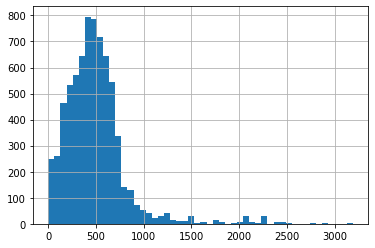

In [70]:
good_data["parks_nearest"].hist(bins=50);

Удалим значения больше 1400 так как они являютя выбросами

In [72]:
good_data=good_data.query('parks_nearest not in (parks_nearest > 1400)')

In [74]:
good_data.shape[0]/data.shape[0]

0.9443218468850789

Всего было удалено 6% негодных значений

Продажа квартир
-----------

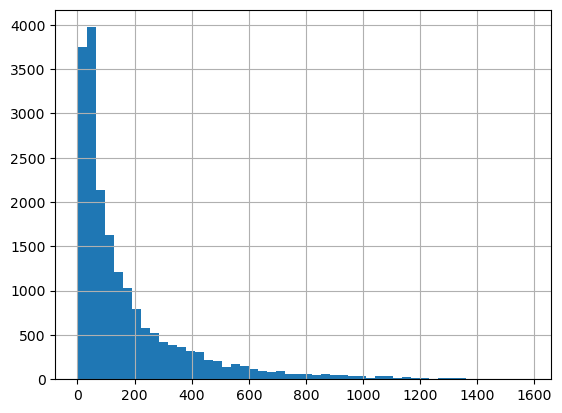

In [78]:
good_data["days_exposition"].hist(bins=50);

In [74]:
(f"Медина = {good_data['days_exposition'].median()} Среднее = {good_data['days_exposition'].mean().round(2)}")

'Медина = 98.0 Среднее = 184.47'

Продажа квартиры, опираясь на данные, обычно составляет 98 дней. Мы берем мединное значение, так как в выборке присутствуют редкие значения, которые сильно влияют на время продажи квартиры.

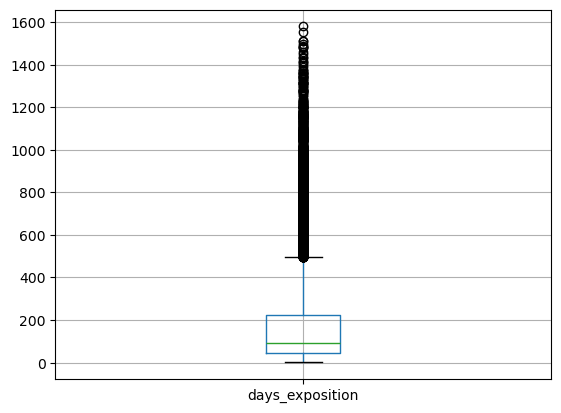

In [79]:
good_data.boxplot("days_exposition");

Опираясь на график boxplot, можно сделать вывод, что в основном квартиры продаются за примерно 235 дней. Продажи, которые занимают, больше 235 дней, можно считать необычайно долгими.

In [80]:
good_data["days_exposition"].describe()

count    19377.000000
mean       176.210611
std        215.087510
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

В boxplot первый квартиль (Q1) показывает, что 25% квартир продаются быстрее чем за 44 дней. Таким образом, 44 дня можно принять как пороговое значение для определения быстрых сделок на рынке недвижимости.

Определение факторов, которые больше всего влияют на общую стоимость объекта
--------------------

In [81]:
good_data.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,parks_nearest,days_exposition,price_per_square_meter,day,month,year,type_floor
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16.0,482.0,NaN,120370.37,3,3,2019,другой
1,3350000,40.4,2018-12-04,1,2.64,11,18.6,1,11.0,Шушары,19.0,NaN,81.0,82920.79,1,12,2018,первый
2,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,8.3,Санкт-Петербург,14.0,90.0,558.0,92785.71,3,8,2015,другой
5,2890000,30.4,2018-09-10,1,2.64,12,14.4,5,9.1,городской Янино-1,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,14.4,Парголово,19.0,NaN,155.0,99195.71,3,11,2017,другой


Зависимость цены от общей площади квартиры
---------------

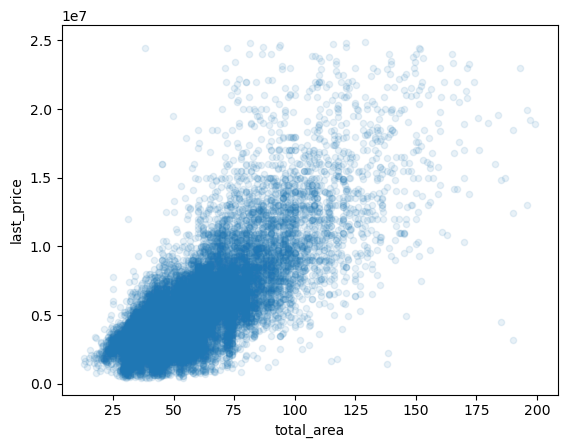

In [82]:
good_data.plot(x="total_area",y="last_price",kind="scatter",alpha=0.1);

In [83]:
good_data["total_area"].corr(good_data["last_price"])

0.764079609043301

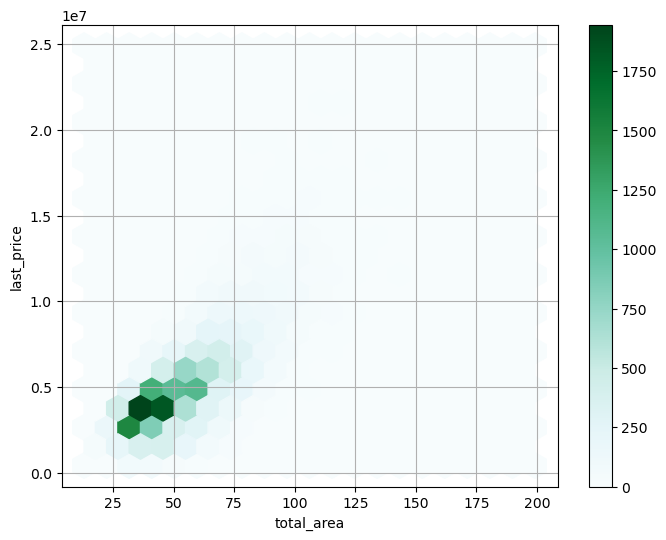

In [84]:
good_data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

На графике видно, что цена квартиры сильно коррелирует с общей площадью до 75 кв. м — наблюдается четкая зависимость, причем большинство объектов сосредоточено именно в этом диапазоне (что хорошо видно на hexbin-графике).

После 75 кв. м связь между площадью и ценой сохраняется, но становится менее выраженной:

Разброс цен увеличивается,

Зависимость выглядит более слабой по сравнению с диапазоном до 75 кв. м.кв. м.

Зависимость цены от жилой площади
------------------

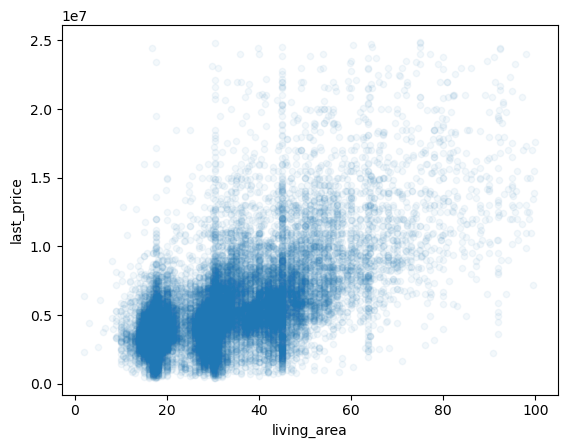

In [85]:
good_data.plot(x="living_area",y="last_price",kind="scatter",alpha=0.05);

In [86]:
good_data["living_area"].corr(good_data["last_price"])

0.6214742439638131

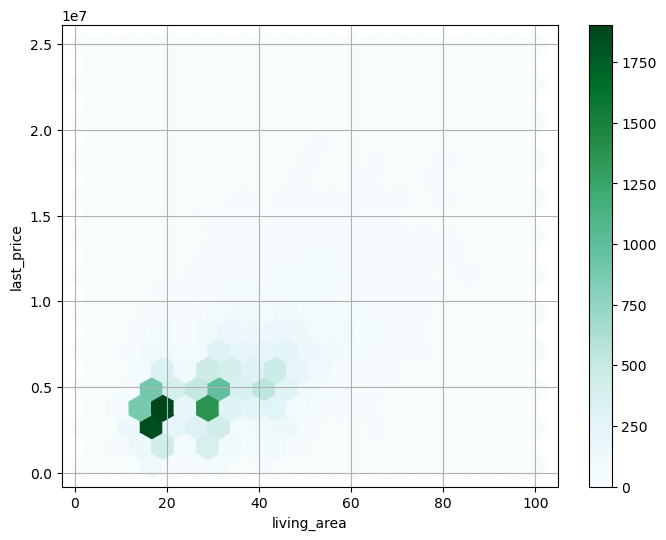

In [87]:
good_data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

На графике видна зависимость цены квартиры от общей жилой площади, однако эта связь менее выражена, чем в случае с общей площадью

Основные наблюдения:

1. Разброс цен выше - при схожих значениях жилой площади стоимость может значительно варьироваться.

2. Основная концентрация объектов - большинство квартир сосредоточено в диапазоне 17-40 кв.м. жилой площади

3. Сравнение с общей площадью - корреляция "цена/жилая площадь" слабее, чем "цена/общая площадь", что может указывать на большое влияние дополнительных факторов(планировка,наличие кухни,санузла,места, где находится квартира, и т. д.)

Вывод:
жилая площадь влияет на цену, но не так сильно, как общая, а вариативность стоимости в этом случае выше

Зависимость цены квартиры от общей площади кухни
-----------------

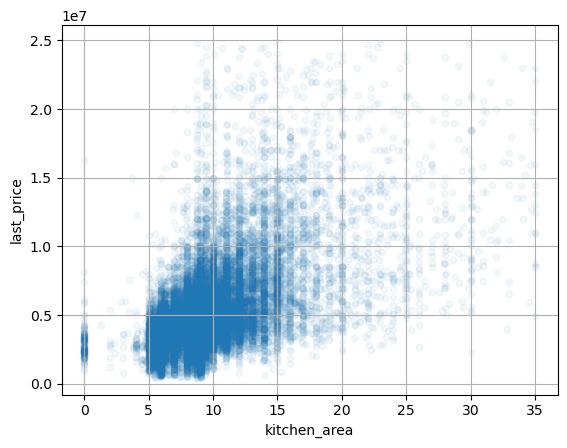

In [88]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter',grid=True,alpha=0.05);

In [112]:
good_data["kitchen_area"].corr(good_data["last_price"])

0.5472596534658096

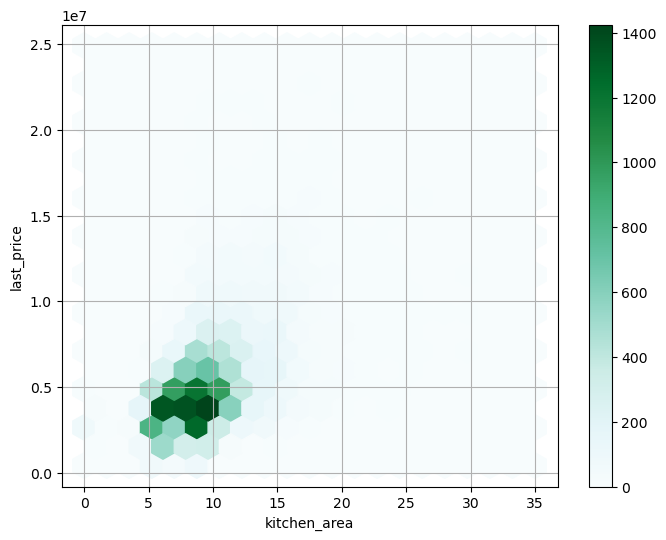

In [113]:
good_data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

На графике наблюдается зависимость цены квартиры от площади кухни, но после 12 кв. м. разброс цен резко увеличивается.

1. До 12 кв.м. - связь между площадью кухни и ценой относительно четкая: чем больше кухня, тем выше стоимость квартиры.

2. После 12 кв.м. - корреляция ослабевает, появляются значительные отклонения в цене при схожих значениях площади. Это объясняется влиянем третьго фактора например: общая площадь квартиры, местом, где расположена квартира, городом и т.д.

Также можно заметить, что в выборке присутствуют квартиры у которых площадь кухни равна 0, это можно объяснить тем, что это квартиры студии.

Вывод: площадь кухни влияет на цену, но после 10 кв.м. ключевую роль начинают играть другие факторы.



Зависимость цены квартиры от количества комнат
--------------

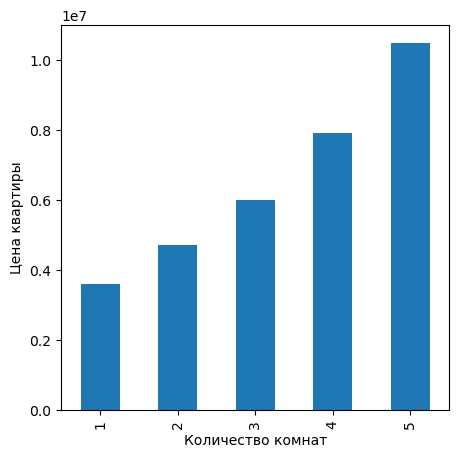

In [91]:
good_data.pivot_table(index="rooms",values="last_price",aggfunc=["median"]).plot(kind="bar",figsize=(5,5),legend=False );
plt.xlabel('Количество комнат');
plt.ylabel('Цена квартиры');

Можно заметить, что цена квартиры зависит от количества комнат.

Зависимость цены квартиры от расположения квартиры (этаж)
-----------------------

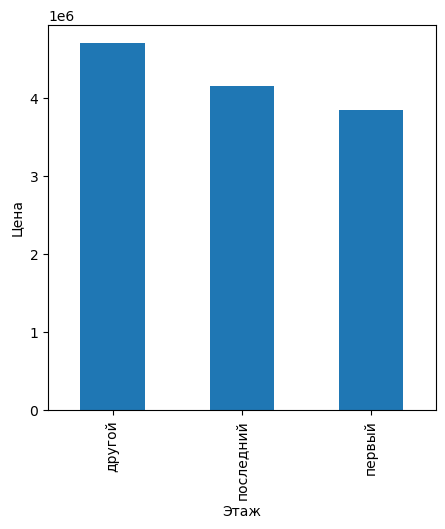

In [92]:
good_data.pivot_table(index=["type_floor"],values="last_price",aggfunc=["median"]).sort_values(by=("median","last_price"),ascending=False).plot(kind="bar",figsize=(5,5),legend=False );
plt.xlabel('Этаж');
plt.ylabel("Цена");

По данному графику, можно сделать вывод, что самая низкая цена у квартир, расположенных на первых этажах. Самая высокая на других этажах.

Зависимость цены от даты размещения квартиры на продажу
---------------------

In [93]:
good_data.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,parks_nearest,days_exposition,price_per_square_meter,day,month,year,type_floor
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16.0,482.0,NaN,120370.37,3,3,2019,другой
1,3350000,40.4,2018-12-04,1,2.64,11,18.6,1,11.0,Шушары,19.0,NaN,81.0,82920.79,1,12,2018,первый
2,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,8.3,Санкт-Петербург,14.0,90.0,558.0,92785.71,3,8,2015,другой
5,2890000,30.4,2018-09-10,1,2.64,12,14.4,5,9.1,городской Янино-1,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,14.4,Парголово,19.0,NaN,155.0,99195.71,3,11,2017,другой


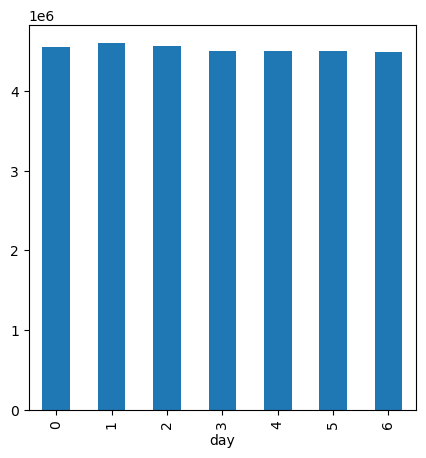

In [94]:
good_data.pivot_table(index=["day"],values="last_price",aggfunc=["median"]).plot(kind="bar",figsize=(5,5),legend=False );

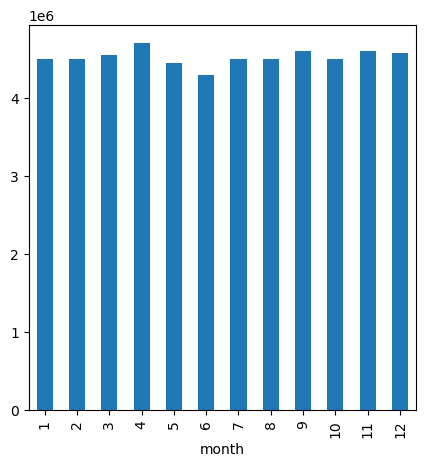

In [95]:
good_data.pivot_table(index=["month"],values="last_price",aggfunc=["median"]).plot(kind="bar",figsize=(5,5),legend=False );

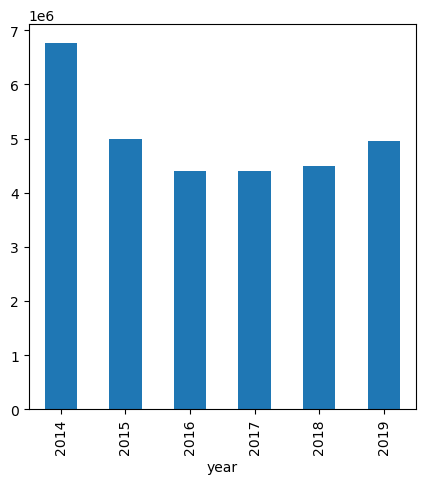

In [96]:
good_data.pivot_table(index=["year"],values="last_price",aggfunc=["median"]).plot(kind="bar",figsize=(5,5),legend=False );

In [93]:
len(good_data.query("year==2014"))

46

In [94]:
len(good_data.query("year==2015"))

369

In [95]:
len(good_data.query("year==2016"))

873

In [96]:
len(good_data.query("year==2017"))

2510

День недели и месяц размещения

На графиках не наблюдается значимой зависимости цены квартиры от дня недели и месяца

Год размещения

В 2014 году медианная цена квартир заметно выше, чем в последующие годы. Это объясняется малым количеством объявлений за 2014 год в выборке: из-за недостатка данных медиана отражает нерепрезентативное значение. Поэтому медианную цену за 2014 год следует исключить из анализа. Также, можно сказать и про 2015 годю После исключения 2014 года и 2015 выявлена маленькая зависимость цены квартиры от года. Это можно объяснить тем, что инфляция растет и все дорожает.



Сравнение цен квадратного метра в квартире в разных населенных пунктах
---------------------------------

In [128]:
good_data.pivot_table(index="locality_name",values="price_per_square_meter",aggfunc=["median","count"]).sort_values(by=("count","price_per_square_meter"),ascending=False)

,median,count
,price_per_square_meter,price_per_square_meter
locality_name,,
Санкт-Петербург,103636.360,14569
Мурино,86666.670,505
Кудрово,95675.475,468
Шушары,76986.130,436
Всеволожск,65789.470,396
...,...,...
Пчева,26829.270,1
Дзержинского,33439.490,1


Text(0, 0.5, 'Цена одного квадратного метра')

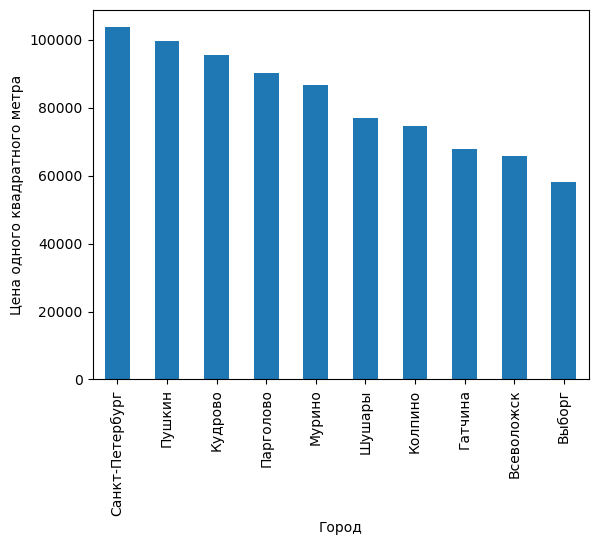

In [125]:
(good_data
 .pivot_table(index="locality_name",values="price_per_square_meter",aggfunc=["median","count"])
 .sort_values(by=("count","price_per_square_meter"),ascending=False)[("median","price_per_square_meter")][0:10]
 .sort_values(ascending=False)
 .plot(kind="bar",legend=False)
)
plt.xlabel("Город")
plt.ylabel("Цена одного квадратного метра")

Самая высокая цена квадратного метра в Санкт-Петербурге, самая дешевая цена квадратного метра в Выборге

In [100]:
good_data.query('locality_name == "Санкт-Петербург"').pivot_table(index="cityCenters_nearest",values="last_price",aggfunc="median")

,last_price
cityCenters_nearest,
2.0,8990000.0
3.0,8000000.0
4.0,8400000.0
5.0,8494500.0
6.0,7800000.0
7.0,6750000.0
8.0,7000000.0
9.0,5207500.0
10.0,4990000.0


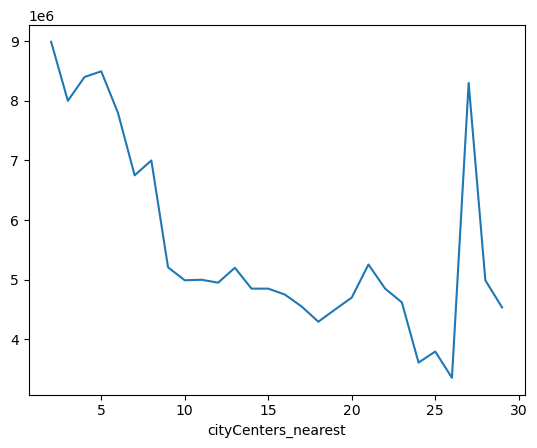

In [101]:
good_data.query('locality_name == "Санкт-Петербург"').pivot_table(index="cityCenters_nearest",values="last_price",aggfunc="median").plot(legend=False);

In [103]:
good_data.query('cityCenters_nearest == 25 and locality_name == "Санкт-Петербург"')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,parks_nearest,days_exposition,price_per_square_meter,day,month,year,type_floor
465,4900000,69.30,2017-05-22,2,2.60,5,34.0,4,11.33,Санкт-Петербург,25.0,453.0,349.0,70707.07,0,5,2017,другой
1411,3150000,38.80,2016-09-01,1,3.65,5,17.0,1,13.00,Санкт-Петербург,25.0,246.0,45.0,81185.57,3,9,2016,первый
3206,3420000,32.00,2018-09-08,1,2.70,25,16.7,23,8.10,Санкт-Петербург,25.0,NaN,44.0,106875.00,5,9,2018,другой
4797,3638724,34.36,2018-10-11,1,2.64,5,10.0,2,9.04,Санкт-Петербург,25.0,246.0,134.0,105900.00,3,10,2018,другой
4886,4300000,49.10,2018-02-01,2,2.60,25,30.5,4,8.80,Санкт-Петербург,25.0,NaN,39.0,87576.37,3,2,2018,другой
4907,5250000,50.60,2018-08-14,2,2.60,25,30.5,3,10.00,Санкт-Петербург,25.0,NaN,60.0,103754.94,1,8,2018,другой
5200,5350000,58.80,2017-09-22,2,2.60,8,24.2,6,16.80,Санкт-Петербург,25.0,267.0,204.0,90986.39,4,9,2017,другой
5422,3240352,34.88,2018-10-10,1,2.64,5,11.0,1,9.04,Санкт-Петербург,25.0,246.0,80.0,92900.00,2,10,2018,первый
6026,3900000,64.00,2017-09-30,2,2.80,5,33.0,1,10.00,Санкт-Петербург,25.0,NaN,45.0,60937.50,5,9,2017,первый
7499,3300000,36.00,2017-09-06,1,2.64,24,17.5,6,10.40,Санкт-Петербург,25.0,NaN,310.0,91666.67,2,9,2017,другой


Четко прослеживается отрицательная зависимость между ценой квартиры и расстоянием от центра. На 25 км от центра наблюдается резкий рост средней цены, что противоречит общей тенденции. Это происходит из-за того, что в этой зоне малое количество объектов(при этом все из них оказались дорогостоящими). Поэтому, зону, расположенную на 25 км от центра, можно исключить из анализа. 

Подготовка данных
1. Заполнили пропущенные значения
2. Исправили типы данных в проблемных столбцах
3. Удалили скрытые дубликаты
4. Добавили новые расчетные столбцы для удобства анализа

Исследовательский анализ
Изучив распределения различных параметров через гистограммы, мы:

1. Выявили и обработали редкие и аномальные значения
2. Определили характерные временные рамки продаж:
    Средний срок продажи - 98 дней
    Быстрая продажа - менее 44 дней
    Долгая продажа - более 235 дней

Факторы ценообразования
Анализ выявил следующие закономерности:
Основные факторы влияния:

1. Общая площадь (наибольшее влияние)
2. Количество комнат
3. Жилая площадь и площадь кухни (менее значимые)

Дополнительные наблюдения:

1. Квартиры на первых этажах имеют минимальные цены
2. Чем дальше от центра, тем ниже стоимость (четкая отрицательная корреляция)
3. Самый дорогой кв.м - в Санкт-Петербурге
4. Самый дешевый кв.м - в Выборге

Временные закономерности

День недели или месяц публикации объявления не влияют на цену

Отмечается стабильный рост цен год от года (возможно, влияние инфляции)